# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

**0. Instalare de librarii si incarcare de date:**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [10]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

df = pd.read_csv(data_url, header=None, names=columns, na_values="?", skipinitialspace=True)
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()

Dataset loaded with 32561 rows and 15 columns.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Distributia variabilei hours-per-week:**

- Pentru contextul de regresii, de obicei ne-am dori sa avam o distributie normala, insa datele cu care lucram nu ne permite acest lux.
- Este de asteptat sa avem un varf foarte mare la marja de 40h/sapt, deoarece acesta este standardul unui job full-time. Asta creeaza o distributie inflata pe baza de valori, unde varianta e concentrata intr-un singur bin.
- Daca este sa ne uitam la scenadisticitate si curtoza, datele apar destul de echilibrate in ambele parti, cu o mica aplecare spre stanga unde sunt cantitati mai "normale" de ore lucrate pe saptamana, de obicei te astepti sa ai 40h sau mai putin din diferite motive, cum ar fi job part-time. Problema pe care o avem in dreapta in stchimb este ca exista respondenti oarecum ca niste outlier-i care intind mult segmentele pana la 100h/sapt, adica undeva la 14h pe zi, ce este inuman, dar posibil in diferite joburi unde  enecesara prezenta constanta.

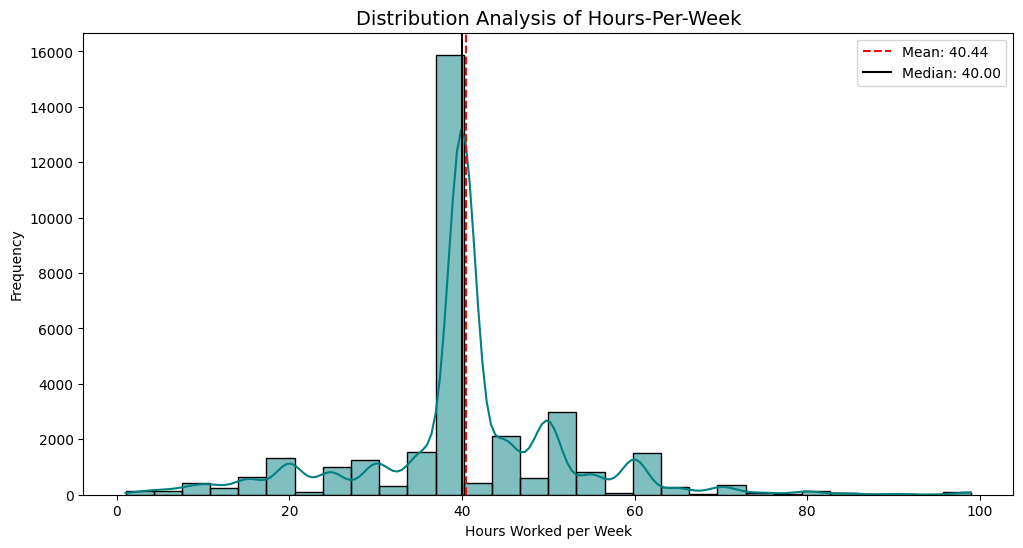

Skewness: 0.2276
Kurtosis: 2.9167


In [11]:
plt.figure(figsize=(12, 6))

# Histogram with KDE
sns.histplot(df['hours-per-week'], bins=30, kde=True, color='teal')
plt.axvline(df['hours-per-week'].mean(), color='red', linestyle='--', label=f'Mean: {df["hours-per-week"].mean():.2f}')
plt.axvline(df['hours-per-week'].median(), color='black', linestyle='-', label=f'Median: {df["hours-per-week"].median():.2f}')

plt.title('Distribution Analysis of Hours-Per-Week', fontsize=14)
plt.xlabel('Hours Worked per Week')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Skewness: {df['hours-per-week'].skew():.4f}")
print(f"Kurtosis: {df['hours-per-week'].kurt():.4f}")

**2. Desciptive despre setul de date:**

- Prin acest display putem vedea scale ale datelor, sa intelegem mai mult cum acestea sunt impartite.
- Pentru datele numerice, ne uitam la mean si abaterea standard, lucruri care evident cer o standardizare/normalizare ca modelul de regresie sa trateze variabilele corect.
- Pentru variabilele categorice, observam cele mai frecvente categorii si frecventele acestora, care creeaza o idee de baza pentru model in stagiile urmatoare. Dupa cum si vedem, 90% din samples sunt indivizi din US, motiv care ne da dreptul sa tratam restul valorilor lipsa ca US ca nu afecteaza cu nimic statistic SAU sa ne faca sa gandim binar o variabila US vs non-US care sa povesteasca doua chestii complet diferite in comparatie una cu cealalta.

In [12]:
print("--- Numerical Descriptive Statistics ---")
display(df.describe())

print("\n--- Categorical Summary ---")
display(df.describe(include=['O']))

--- Numerical Descriptive Statistics ---


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000



--- Categorical Summary ---


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


**3. Cuantificarea datelor lipsa:**

- Se cuantifica lipsurile atat prin count absolut, dar si prin procentul relativ la fiecare coloana.
- In datele noastre, avem valori lipsa in locuri destul de tipicare, cum ar fi ocupation, workclass si native-country.
- Daca o coloana cum ar fi occupation are lipsa 5.6% din date, trebuie sa se faca o decizie daca acele randuri sunt eliminate sau imputate.
- Avand in vedere ca tema noastra trebuie sa prezica hours-per-week, lipsa datelor din categoria mentionata poate sa semnaleze faptul ca indivizii care nu au completat poate nu apartin fortei de munca la momentul actual, facand imputarea o maniera mult mai sigura si conservatoare de date, fata de stergere.

In [13]:
missing_count = df.isnull().sum()
missing_pct = (missing_count / len(df)) * 100

missing_report = pd.DataFrame({
    'Missing Count': missing_count,
    'Percentage (%)': missing_pct
}).sort_values(by='Percentage (%)', ascending=False)

missing_report = missing_report[missing_report['Missing Count'] > 0]

print("--- Missing Values Report ---")
display(missing_report)

--- Missing Values Report ---


,Missing Count,Percentage (%)
occupation,1843,5.660146
workclass,1836,5.638647
native-country,583,1.790486


**4. Detectie de outlier-i prin boxplots:**

- Intr-un model de regresie, outlier-i in variabile cum ar fi capital-gain sau age pot influenta bias-ul modelului.
- Prin boxplots, putem observa mai bine acesti indivizi si sa intelegem daca sunt outlier-i sporadici, sau daca este un pattern al acestora, daca se formeaza vreo coada sau ceva care sa semnaleze vreo problema
- In categoria age putem observa foarte multi indivizi care lucreaza dupa varsta de 80 de ani (ceea ce e plauzibil in economia asta...). Chiar daca sunt puncte valide cercetarii, sunt suficient de rari incat sa ii consideram outlieri, si posibil sa fie nevoie de cap-uri sau clipuri in stagiul de preprocesare pentru a preveni coeficientii regresiei sa fie skewed.

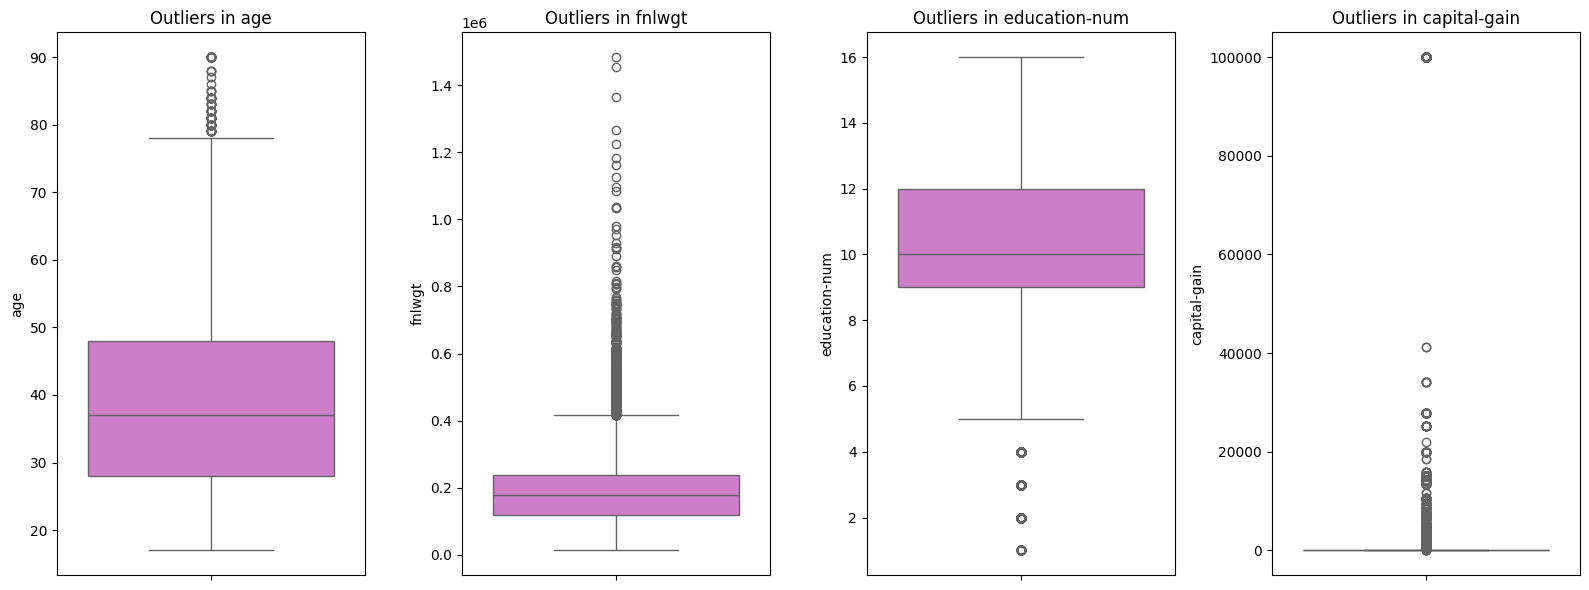

In [14]:
num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain']

plt.figure(figsize=(16, 6))
for i, col in enumerate(num_cols):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[col], color='orchid')
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()

**5. Analiza de multivarietate si corelatie:**

- O matrice de corelatie ne ajuta sa intelegem cele mai puternice relatii liniare. Conform heatmap-ului, vedem ca nu exista vreo problema de colinearitate, avand valori ultra mici, sub 0.2 in majoritatea cazurilor.
- O analiza categorica prin boxplots arata discrepante dintre genul si clasa indivizilor, lucruri care pot avea un impact masiv pe mediana orelor lucrate, sugerand aceste categorii ca fiind predictori puternici,

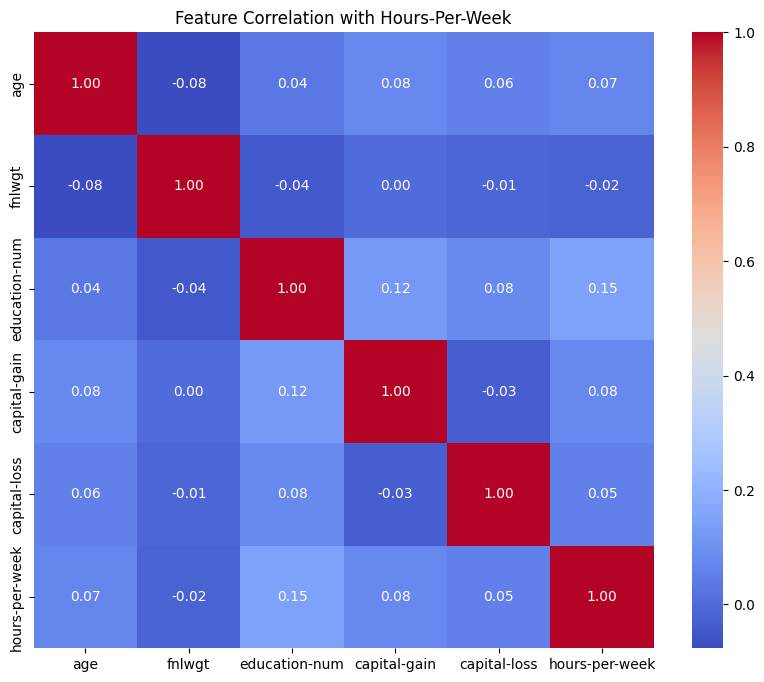

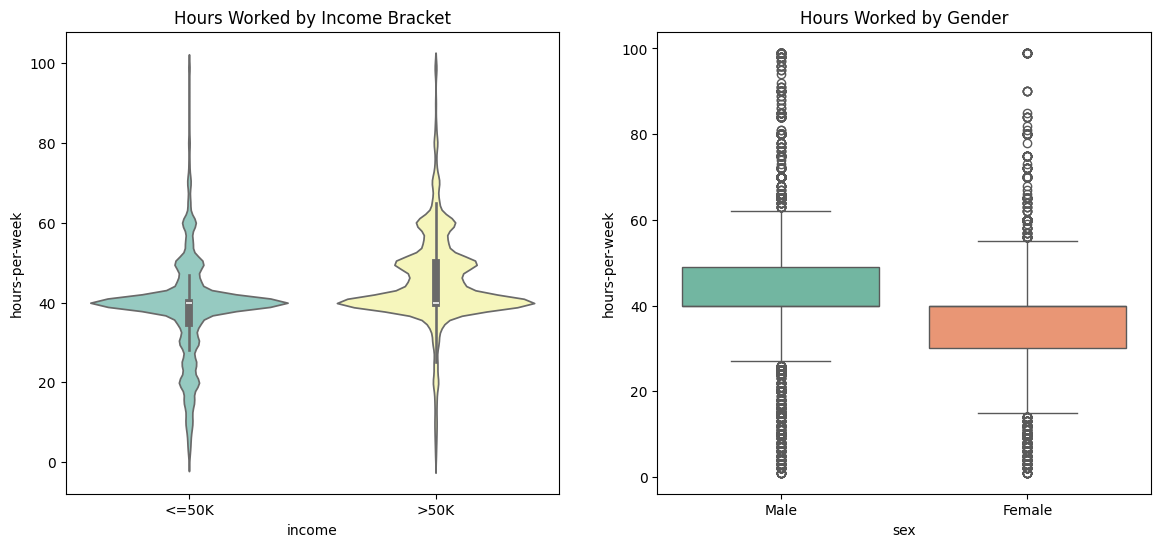

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation with Hours-Per-Week')
plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='income', y='hours-per-week', data=df, hue='income', palette='Set3', legend=False)
plt.title('Hours Worked by Income Bracket')

plt.subplot(1, 2, 2)
sns.boxplot(x='sex', y='hours-per-week', data=df, hue='sex', palette='Set2', legend=False)
plt.title('Hours Worked by Gender')

plt.show()

**6. Summary report:**

- Am observat mai multe chestii care dicteaza modul in care modelul trebuie abordat si gandit:
    - Variabila pe care vrem sa o explicam nu are o distributie normala, cu varf la valoarea 40.
    - Valori lipsa exista in categorii legate de statutul angajatilor, care cere imputate in loc de stergere de date pentru a ramane cu un dataset integru.
    - fnlwgt are 0 corelatie cu orele lucrate, deci am putea sa o eliminam complet.
    - Se vede clar distictia in orele lucrate in functie de categoria de income si gen confirma codarea categorica sa fie cea mai influenta pentru model.

**7. Analiza a datelor preprocesate:**

- Dupa normalizare, variabilele arata ca au un mean de 0 si o abatere standar de 1.
- Daca facem din nou ploturile, se vede cu ochiul liber ca forma distributiei ramane aceeasi, dar scala e acum uniforma pe taote variablelel.
- Standardizarea e cruciala pentru a ne asigura ca nu exista variabile care domina modelul doar pentru ca au numere net mai mari decat alte variabile.

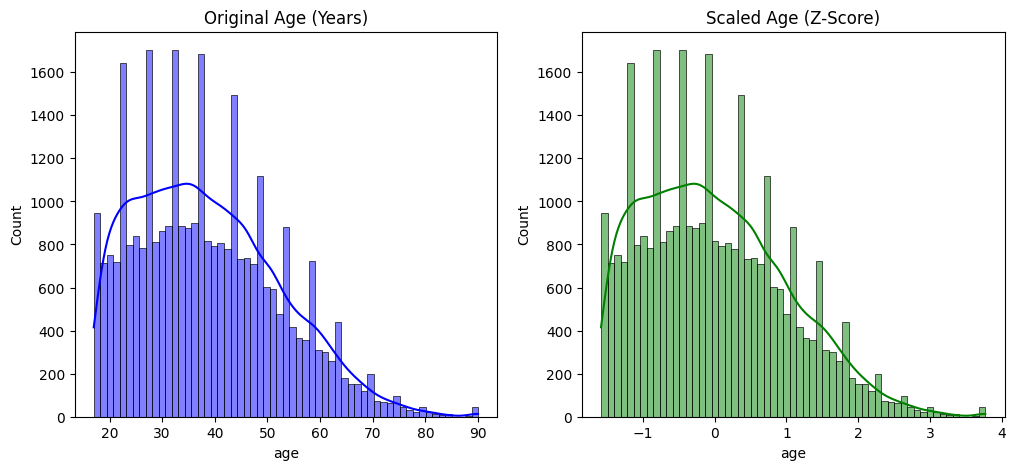

After preprocessing, the mean of the numerical features is approximately: [-0. -0.  0.]


In [16]:

scaler = StandardScaler()
df_scaled = df.copy()
numeric_cols = ['age', 'fnlwgt', 'education-num']
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols].fillna(df[numeric_cols].median()))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True, color='blue')
plt.title('Original Age (Years)')

plt.subplot(1, 2, 2)
sns.histplot(df_scaled['age'], kde=True, color='green')
plt.title('Scaled Age (Z-Score)')
plt.show()

print("After preprocessing, the mean of the numerical features is approximately:", 
      np.round(df_scaled[numeric_cols].mean(), 2).values)